In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime, timedelta
from scipy.optimize import curve_fit,leastsq
from matplotlib.patches import Ellipse, Rectangle
import matplotlib.transforms as transforms

In [3]:
def minsec2decimal(x):
    i, d = divmod(x, 1)
    return round((i*60+d*100)/60,2)

def pace2speed(x):
    i, d = divmod(x, 1)
    return round(3600/(i*60+d*100),2)

def avg_speed(km,minutes):
    i, d = divmod(minutes, 1)
    return round(3.6*km*1000/(i*60+d*100),2)

def km_run(avg_speed,minutes):
    i, d = divmod(minutes, 1)
    return round((avg_speed/3.6*(i*60+d*100))/1000,2)

In [4]:
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor="none", edgecolor="none", **kwargs):
    
    """ Create a plot of the covariance confidence ellipse of *x* and *y*.
    - Parameters ----------
    x, y : array-like, shape (n, )
    - Input data.
    ax : matplotlib.axes.Axes - The axes object to draw the ellipse into.
    n_std : float - The number of standard deviations to determine the ellipse's radiuses.
    **kwargs - Forwarded to `~matplotlib.patches.Ellipse`
    - Returns -------
    matplotlib.patches.Ellipse"""
    
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1] / np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),width=ell_radius_x * 2,height=ell_radius_y * 2,facecolor=facecolor,edgecolor=edgecolor,**kwargs,)

    # Calculating the standard deviation of x from the squareroot of the variance and multiplying with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = (transforms.Affine2D().rotate_deg(45).scale(scale_x, scale_y).translate(mean_x, mean_y))

    ellipse.set_transform(transf + ax.transData)
    
    return ax.add_patch(ellipse)

In [8]:
km_run(avg_speed=13,minutes=2.02)

0.44

In [10]:
avg_speed(km=3.12,minutes=17.03)

10.98

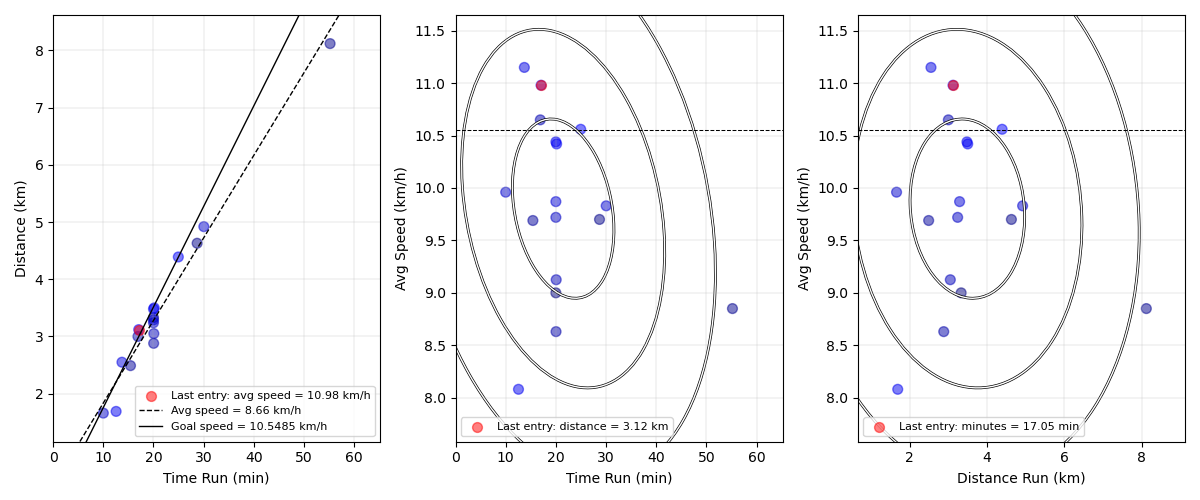

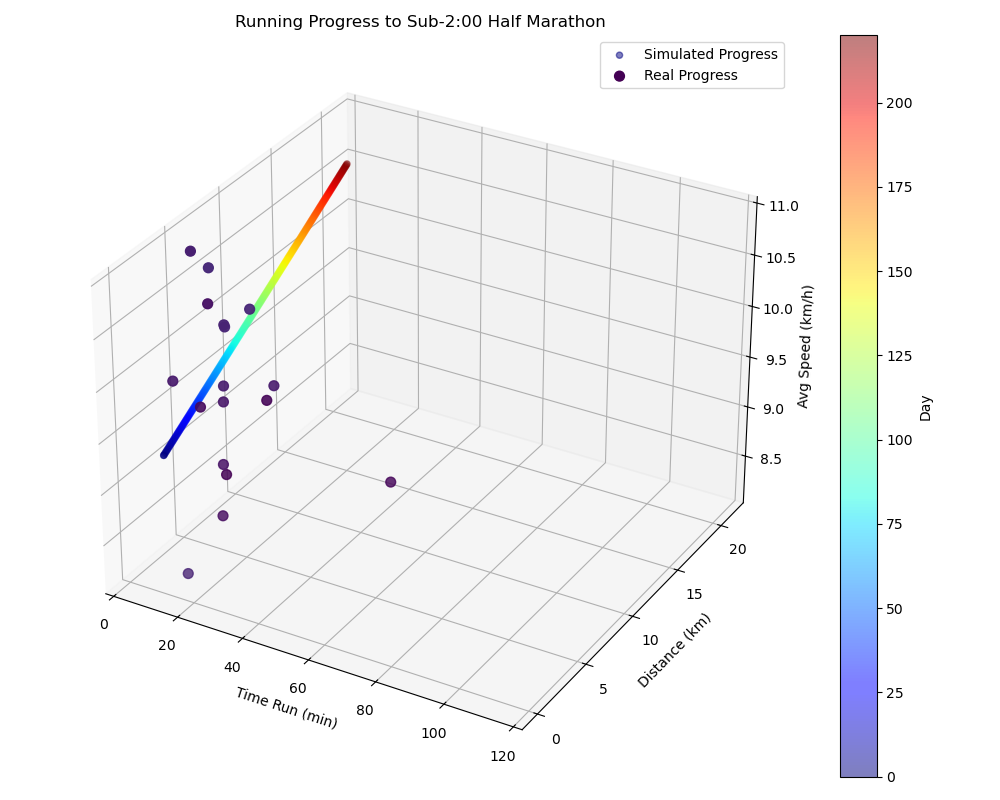

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime, timedelta

mpl.pyplot.close()

# Enable interactive 3D plot in JupyterLab
%matplotlib widget

# Set up dates (March 20, 2025 to October 26, 2026 = 586 days)
start_date = datetime(2025, 3, 20)
end_date = datetime(2026, 10, 26)
days = (end_date - start_date).days + 1  # Include end date
dates = [start_date + timedelta(days=i) for i in range(days)]

# --- Running Progress (Simulated) ---

# Set up dates (March 20, 2025 to October 26, 2025 = 221 days)
start_date = datetime(2025, 3, 20)
end_date = datetime(2025, 10, 26)
days = (end_date - start_date).days + 1  # Include end date
dates = [start_date + timedelta(days=i) for i in range(days)]

# Simulate running data over 221 days
#day_indices = np.arange(days)
#distance = np.concatenate([np.array([3.33]), np.linspace(3.33, 10, 55), np.linspace(10, 16, 85), np.linspace(16, 21.1, 80)])
#pace_start = 6.67  # 20 min / 3.33 km
#pace_goal = 5.683  # 5:41 min/km
#paces = np.concatenate([np.array([pace_start]), np.linspace(pace_start, pace_goal, days-1)])
#time_run = distance * paces  # minutes
#avg_speed = 60 / paces  # km/h

# Simulate running data over 221 days
day_indices = np.arange(days)
distance = np.concatenate([np.array([3.33]), np.linspace(3.33, 21.1, days-1)])
avg_speed = np.concatenate([np.array([9]), np.linspace(9, 10.5, days-1)])  # km/h
time_run = distance / avg_speed  # minutes

# Real Running Data (starts with today’s entry)
time_run_real = [20,np.nan,28.42,55.12,np.nan,np.nan,15.25,np.nan,20.02,np.nan,16.54,np.nan,20.04,20.00,np.nan,10.00,30.02,20.00,np.nan,13.43,np.nan,20.00,12.33,20.09,24.57,17.03] # minutes, March 20
time_run_real = np.concatenate([time_run_real, np.zeros(days-len(time_run_real))])
distance_real = [3.33,np.nan,4.63,8.12,np.nan,np.nan,1+1.49,np.nan,2.88,np.nan,3.00,np.nan,3.05,3.24,np.nan,1.66,4.92,3.29,np.nan,2.55,np.nan,3.48,1.69,3.50,4.39,3.12]  # km, 20 min at 9 km/h
distance_real = np.concatenate([distance_real, np.zeros(days-len(distance_real))])
avg_speed_real = [9,np.nan,9.7,8.85,np.nan,np.nan,9.69,np.nan,8.63,np.nan,10.65,np.nan,9.125,9.72,np.nan,9.96,9.83,9.87,np.nan,11.15,np.nan,10.44,8.08,10.42,10.56,10.98]  # km/h
avg_speed_real = np.concatenate([avg_speed_real, np.zeros(days-len(avg_speed_real))])

for i in range(len(time_run_real)):
    if time_run_real[i] > 1:
        a, b = divmod(time_run_real[i], 1)
        time_run_real[i] = (a*60+b*100)/60
        
# time_run_real = [(a*60 + b*100)/60 if x > 1 else x for x, (a, b) in [(t, divmod(t, 1)) for t in time_run_real]]
        

# Running 3D Plot
fig2 = plt.figure(figsize=(10, 8))
ax = fig2.add_subplot(111, projection='3d')
scatter_sim = ax.scatter(time_run, distance, avg_speed, c=day_indices, cmap='jet', s=20, label='Simulated Progress', alpha=.5)
scatter_real = ax.scatter(time_run_real, distance_real, avg_speed_real, c=day_indices, cmap='viridis', s=50, label='Real Progress')
ax.set_xlabel('Time Run (min)')
ax.set_ylabel('Distance (km)')
ax.set_zlabel('Avg Speed (km/h)')
ax.set_title('Running Progress to Sub-2:00 Half Marathon')
fig2.colorbar(scatter_sim, label='Day', alpha = .5)
ax.set_zlim([min(avg_speed_real[avg_speed_real>1]),11])
ax.set_xlim([0,120])
ax.legend()
plt.tight_layout()

x = time_run_real[time_run_real>1]; y = distance_real[time_run_real>1];
popt, pcov = curve_fit(lambda t,a,b: a*t+b, x, y)
a_fit,b_fit = popt[0],popt[1];
x_fit = np.linspace(0,120,200)
fit = a_fit*x_fit+b_fit;

goal_speed = 10.5485*x_fit/60;

# Running 3D Plot
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(131); ax2 = fig.add_subplot(132); ax3 = fig.add_subplot(133);

# Plot all points except last one in ax1
ax1.scatter(time_run_real, distance_real, c=day_indices, cmap='jet', s=50, alpha=0.5)
# Plot last point in red
last_point = ax1.scatter(time_run_real[distance_real>0][-1], distance_real[distance_real>0][-1], c='red', s=50, alpha=0.5, label=f'Last entry: avg speed = {round(avg_speed_real[distance_real>0][-1], 2)} km/h')

ax1.plot(x_fit,fit,'--k',lw=1,label='Avg speed = ' + str(round(60*a_fit,2)) + ' km/h');
ax1.plot(x_fit,goal_speed,'-k',lw=1,label='Goal speed = 10.5485 km/h');
ax1.grid(lw=.2)

ax2.axhline(y=10.55,ls='--',lw=.75,color='k')
ax2.scatter(time_run_real,avg_speed_real, c=day_indices, cmap='jet', s=50, alpha = .5)
# Plot last point in red
last_point = ax2.scatter(time_run_real[distance_real>0][-1], avg_speed_real[distance_real>0][-1], c='red', s=50, alpha=0.5, label=f'Last entry: distance = {round(distance_real[distance_real>0][-1], 2)} km')
for i in range(1,4):
    confidence_ellipse(time_run_real[distance_real>0], avg_speed_real[distance_real>0], ax2, n_std=i, linewidth=2, facecolor='none', edgecolor='k')
    confidence_ellipse(time_run_real[distance_real>0], avg_speed_real[distance_real>0], ax2, n_std=i, linewidth=1, facecolor='none', edgecolor='w')
ax2.grid(lw=.2)

ax3.axhline(y=10.55,ls='--',lw=.75,color='k')
ax3.scatter(distance_real,avg_speed_real, c=day_indices, cmap='jet', s=50, alpha = .5)
# Plot last point in red
last_point = ax3.scatter(distance_real[distance_real>0][-1], avg_speed_real[distance_real>0][-1], c='red', s=50, alpha=0.5, label=f'Last entry: minutes = {round(time_run_real[distance_real>0][-1], 2)} min')
for i in range(1,4):
    confidence_ellipse(distance_real[distance_real>0], avg_speed_real[distance_real>0], ax3, n_std=i, linewidth=2, facecolor='none', edgecolor='k')
    confidence_ellipse(distance_real[distance_real>0], avg_speed_real[distance_real>0], ax3, n_std=i, linewidth=1, facecolor='none', edgecolor='w')
ax3.grid(lw=.2)

ax1.legend(fontsize=8); ax2.legend(fontsize=8); ax3.legend(fontsize=8)
ax1.set_xlabel('Time Run (min)'); ax2.set_xlabel('Time Run (min)'); ax3.set_xlabel('Distance Run (km)');
ax1.set_ylabel('Distance (km)'); ax2.set_ylabel('Avg Speed (km/h)'); ax3.set_ylabel('Avg Speed (km/h)');
ax1.set_xlim([0,max(time_run_real[time_run_real>1])+10]); ax1.set_ylim([min(distance_real[distance_real>1])-0.5,max(distance_real[distance_real>1])+0.5])
ax2.set_xlim([0,max(time_run_real[time_run_real>1])+10]); ax2.set_ylim([min(avg_speed_real[avg_speed_real>1])-0.5,max(avg_speed_real[avg_speed_real>1]+0.5)])
ax3.set_xlim([min(distance_real[distance_real>1])-1,max(distance_real[distance_real>1])+1]); ax3.set_ylim([min(avg_speed_real[avg_speed_real>1])-0.5,max(avg_speed_real[avg_speed_real>1]+0.5)])
plt.tight_layout();

# Show plots
plt.show();